In [1]:
%matplotlib notebook
from PySide2.QtWidgets import *
from datetime import date
print("Running date:", date.today().strftime("%B %d, %Y"))
import pyleecan
print("Pyleecan version:" + pyleecan.__version__)
import SciDataTool
print("SciDataTool version:" + SciDataTool.__version__)

Running date: April 13, 2023
Pyleecan version:1.3.9
SciDataTool version:2.5.0


(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:title={'center':'HDEV_nskew'}, xlabel='Position along x-axis [m]', ylabel='Position along y-axis [m]'>)

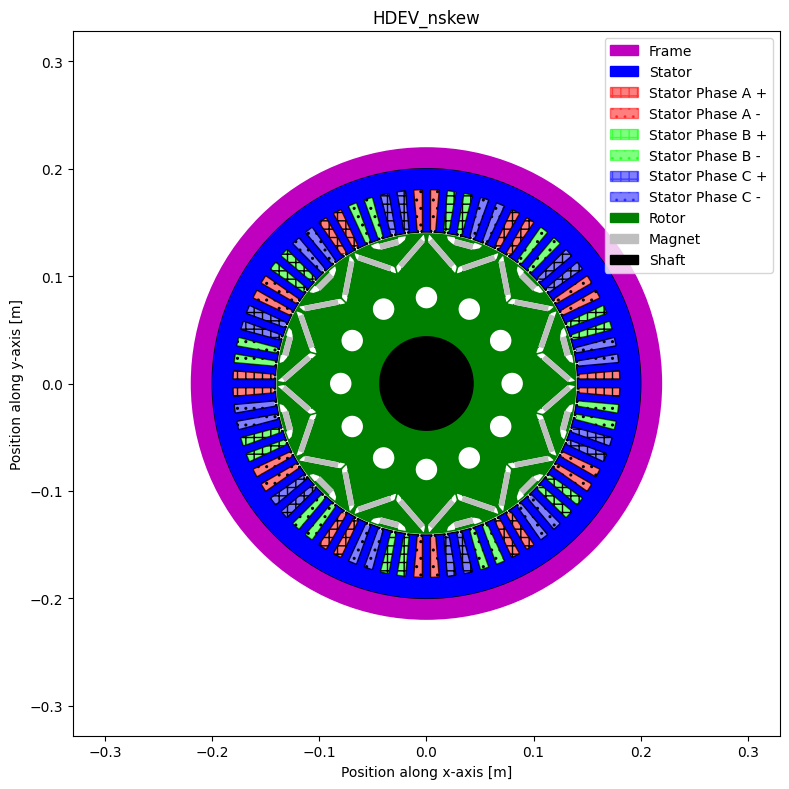

In [11]:
%matplotlib inline

# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
# path=r'Z:\Thesis\NVH\HDEV_whole_nskew.json'
path=r'Z:\Thesis\HDEV\06_Pyleecan\HDEV_nskew.json'
# path='z:/Thesis/HDEV/06_Pyleecan/HDEV_whole_nskew.json'
# path.replace('\',)
HDEV_12p = load(path)
HDEV_12p.plot()


In [13]:
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.Electrical import Electrical
from pyleecan.Classes.EEC_PMSM import EEC_PMSM
from pyleecan.Classes.MagFEMM import MagFEMM

# Initialization of the Simulation
simu = Simu1(name="tuto_elec", machine=HDEV_12p)
# Definition of the Electrical Equivalent Circuit
eec = EEC_PMSM(  # No parameter enforced => compute all
    fluxlink=MagFEMM(is_periodicity_a=True, T_mag=60),  # Magnetic model to compute fluxlinkage
)
# The Electrical module is defined with the EEC
simu.elec = Electrical(eec=eec)

# Run only Electrical module
simu.mag = None
simu.force = None
simu.struct = None

In [14]:
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.OPdq import OPdq
from numpy import sqrt, exp, pi

# Definition of a sinusoidal current
simu.input = InputCurrent()

I0_rms = 250/sqrt(2) # Maximum current [Arms]
Phi0 = 140*pi/180  # Maximum Torque Per Amp

simu.input.OP = OPdq(N0 = 2000)
simu.input.OP.set_I0_Phi0(I0_rms, Phi0)

simu.input.Nt_tot = 50 # Number of time steps
simu.input.Na_tot = 2048 # Spatial discretization

(simu.input.OP.Id_ref,simu.input.OP.Iq_ref)

(-135.4188051049254, 113.62986941801093)

s

In [126]:
print(b.winding)

parent = <class 'pyleecan.Classes.LamSlotWind.LamSlotWind'> object
is_reverse_wind = False
Nslot_shift_wind = 0
qs = 3
Ntcoil = 11
Npcp = 4
type_connection = None
p = 6
Lewout = 0.08
conductor = parent = <class 'pyleecan.Classes.Winding.Winding'> object
	cond_mat = parent = <class 'pyleecan.Classes.CondType12.CondType12'> object
		name = "Copper1"
		is_isotropic = True
		elec = parent = <class 'pyleecan.Classes.Material.Material'> object
			rho = 1.73e-08
			epsr = 1
			alpha = 0.00393
		mag = None
		
		struct = parent = <class 'pyleecan.Classes.Material.Material'> object
			rho = 8900.0
			Ex = 115000000000.0
			Ey = 115000000000.0
			Ez = 115000000000.0
			nu_xy = None
			nu_xz = None
			nu_yz = None
			Gxz = None
			Gxy = None
			Gyz = None
		HT = parent = <class 'pyleecan.Classes.Material.Material'> object
			lambda_x = 385.0
			lambda_y = 385.0
			lambda_z = 385.0
			Cp = 381.0
			alpha = 1.6e-05
		eco = parent = <class 'pyleecan.Classes.Material.Material'> object
			cost_unit = 6

In [16]:
out = simu.run()

[05:27:28] Starting running simulation tuto_elec (machine=HDEV_nskew)
[05:27:28] Starting Electric module
[05:27:28] Starting running simulation tuto_elec_FluxLinkFEMM (machine=HDEV_nskew)
[05:27:28] Starting Magnetic module
[05:27:30] Solving time steps: 0%
[05:29:05] Solving time steps: 25%
[05:30:36] Solving time steps: 50%
[05:32:09] Solving time steps: 75%
[05:33:39] Solving time step: 100%
[05:33:39] End of simulation tuto_elec_FluxLinkFEMM
[05:33:39] Starting running simulation tuto_elec_FluxLinkFEMM_FluxLinkFEMM (machine=HDEV_nskew)
[05:33:39] Starting Magnetic module
[05:33:40] Solving time steps: 0%
[05:34:30] Solving time steps: 25%
[05:35:27] Solving time steps: 50%
[05:36:22] Solving time steps: 75%
[05:37:16] Solving time step: 100%
[05:37:16] End of simulation tuto_elec_FluxLinkFEMM_FluxLinkFEMM
[05:37:16] End of simulation tuto_elec


c:\Users\KDH2018-PC\anaconda3\envs\py38_pcan142\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:539: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


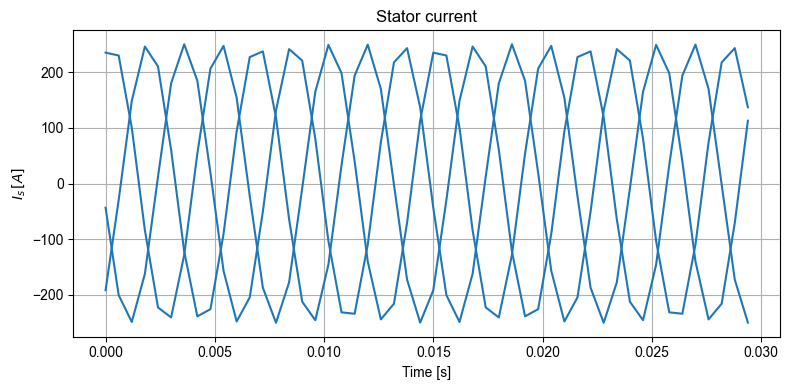

In [17]:
out.elec.get_Is().plot_2D_Data("time", "phase")

In [18]:
from numpy import linspace, array, pi
Tem_av_ref = array([79, 125, 160, 192, 237, 281, 319, 343, 353, 332, 266, 164, 22]) # Yang et al, 2013
Phi0_ref = linspace(60 * pi / 180, 180 * pi / 180, Tem_av_ref.size)
N_simu = Tem_av_ref.size

In [ ]:
PWM=ImportGenPWM(
    fmax=2 * freq_max, fswi=5000, Vdc1=Vdc1, typePWM=param_dict["type_PWM"]


In [ ]:
                Uabc, Vas, _, carrier, time = test_obj.get_data()

                # Plot/save the result
                plt.close("all")
                plt.plot(time, Uabc[:, 1])
                plt.plot(time, Vas)
                plt.plot(time, carrier)
                fig = plt.gcf()
                fig.savefig(
                    join(
                        save_path,
                        "test_ImportGenPWM_"
                        + str(ii)
                        + "_"
                        + str(jj)
                        + "_"
                        + str(hh)
                        + "_SPWM.png",
                    )
                )
